In [4]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_blobs, make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

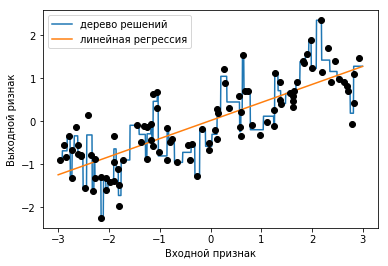

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="дерево решений")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="линейная регрессия")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Входной признак')
plt.ylabel("Выходной ризнак")
plt.legend(loc='best')

In [9]:
bins= np.linspace(-3, 3, 11)
print ('категории: {}'.format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [10]:
# записать в какую категорию попадает каждая точка
which_bin = np.digitize(X, bins=bins)
print ('\nТочки данных:\n', X[:5])
print ('\nКатегории для точек данных:\n', which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder
#Преобразвоание с помощью OneHot
encoder = OneHotEncoder(sparse=False)
# encode.fit находит уникальные значения имеющихся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print (X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [14]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


Text(0.5,0,'Входной признак')

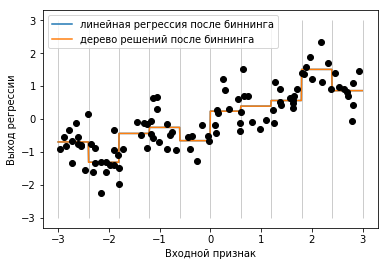

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='линейная регрессия после биннинга')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")